<a href="https://colab.research.google.com/github/kronze1996/Credit-Card-Default/blob/main/Kartikey_Sharma_Team_3_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#Introduction 

##Prediction of Credit card defaulters 
In today’s world most people have a credit card by the time they turn eighteen years old. It is normal to swipe a credit card to buy your children Christmas, because credit card companies now offer rewards where an individual receives money back or maybe even a discount flight. People used to not want to buy their children’s Christmas on credit, but rather work a little harder and save up the money to buy it.

So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka **credit card defaulters**.

***Here we will tackle this problem by predicting people who will or might fall into the category of credit card defaulters.***

#Exploratory Data Analysis

###Basic Data Analysis

Now as for our first task we will implement all the libraries

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/default of credit card clients.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

What we know about dataset :

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* SEX: Gender (1 = male, 2 = female)
* EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = divorce)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005
(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
del df['ID']

###Gender

Plotting gender graph where 1,2 are male and female respectively.

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

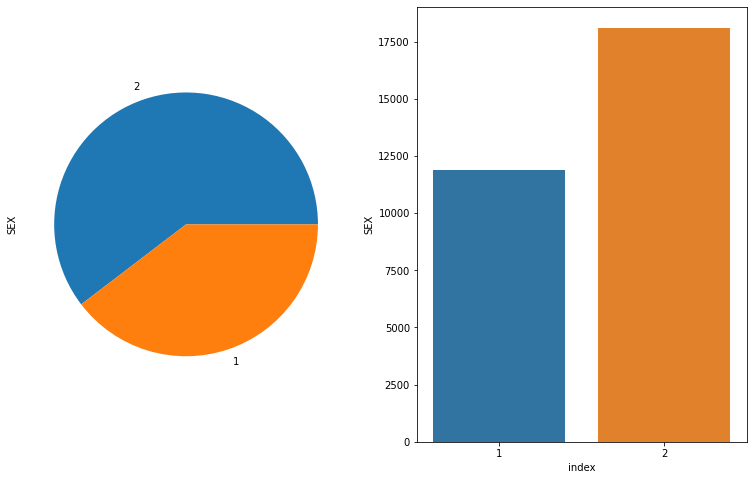

<Figure size 936x576 with 0 Axes>

In [ ]:
# female = df[df['X2'] == 2].value_counts()
# male = df[df['X2'] == 1].value_counts()
# gender=[female,male]
# plt.figure()
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
Day_df=df['SEX'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='SEX',data=Day_df,ax = axes[1])

So from here we can see that the most number of credit card holders are be women.

###Education status

Plotting graph for all education status where 1 is graduate school passed, 2 is university passed, 3 is high school passed and 4 are others

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
# df1=df.copy()
def chg(col):
  x=col
  if (col==0) or (col==5) or (col==6):
    x=4
  return x
df['EDUCATION']=df['EDUCATION'].apply(chg)

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

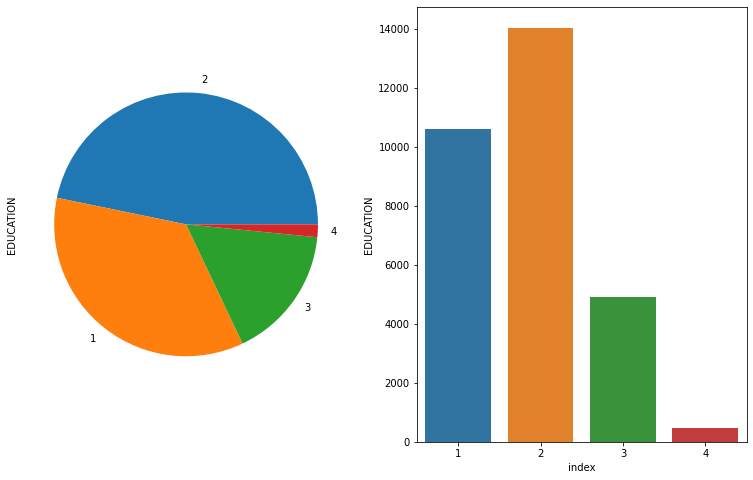

<Figure size 936x576 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
Day_df=df['EDUCATION'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['EDUCATION'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='EDUCATION',data=Day_df,ax = axes[1])

Here we see all the different categories of education of people (high school, graduation, university, others)

In [ ]:
# df[df['X2']==2]['']

###Marital Status

Plotting graph of number of people with their marital status as 1, 2 and 3 represents married, single and others respectively.

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

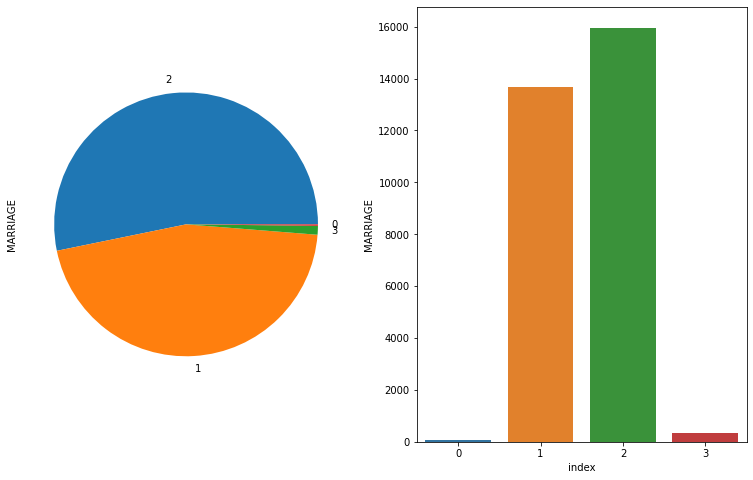

<Figure size 936x576 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(13,8))
Day_df=df['MARRIAGE'].value_counts().reset_index()
plt.figure(figsize=(13,8))
df['MARRIAGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='MARRIAGE',data=Day_df,ax = axes[1])

Similarly we can see the distribtion of marital status into 3 parts (Married, Unmarried and others)

###Age

Plotting graph of number of ages of all people with credit card irrespective of gender.

In [ ]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

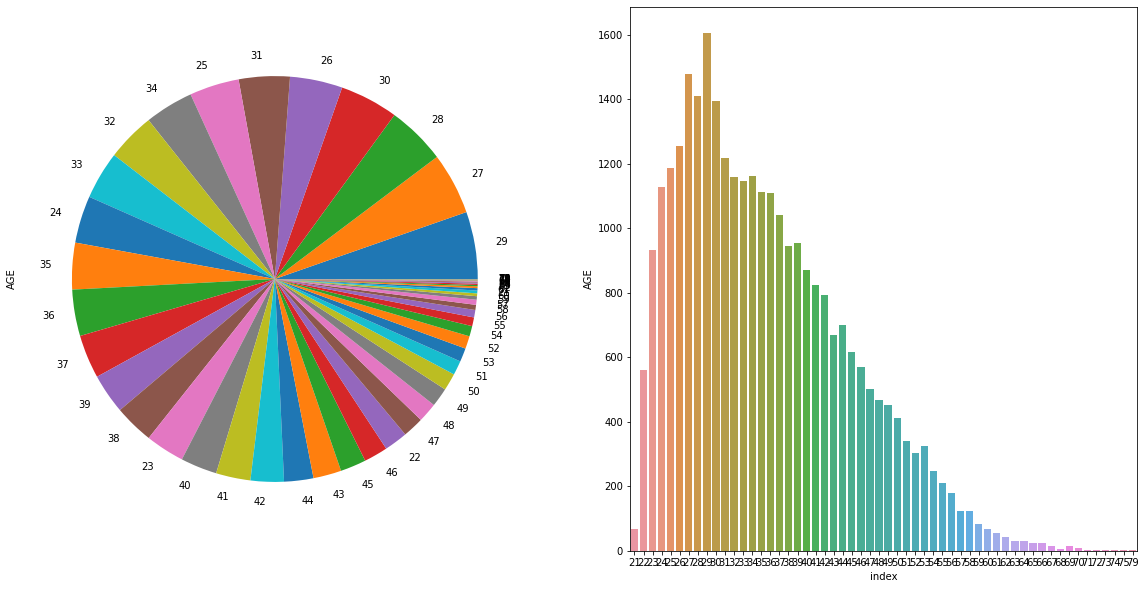

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_df=df['AGE'].value_counts().reset_index()
df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=Day_df,ax = axes[1],orient='v')


Age has quite a beautiful pie chart and we can see it varies from 20 to 74

##Basic Analysis

Let's start with the Basic analysis after the completion of our variable count analysis to find out the number of defaulters.

In [ ]:
col=df.columns
col

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

First we will find all the anomalies or outliers using the box plot and get some idea what's going on in our dataset.

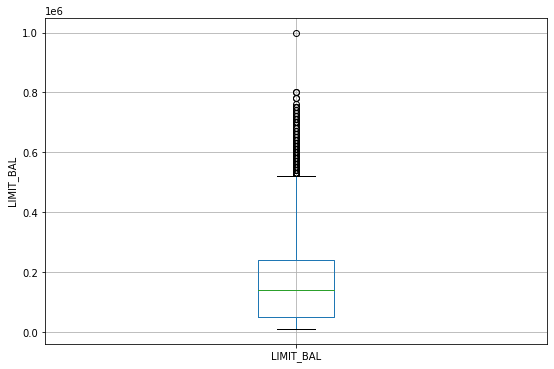

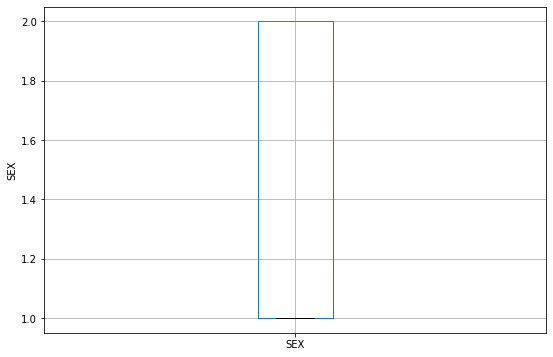

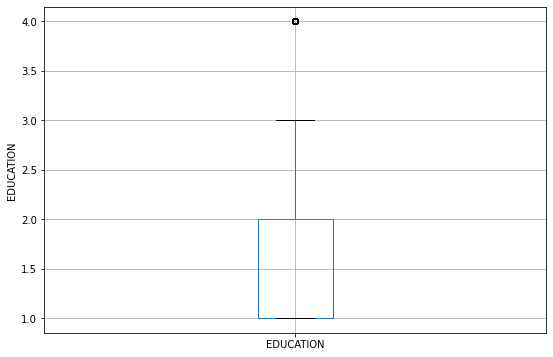

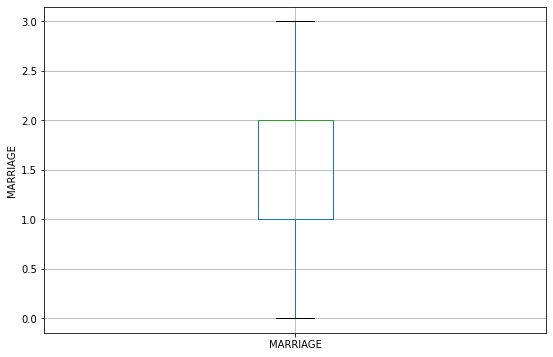

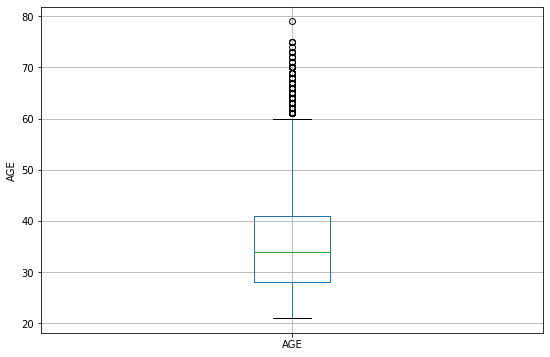

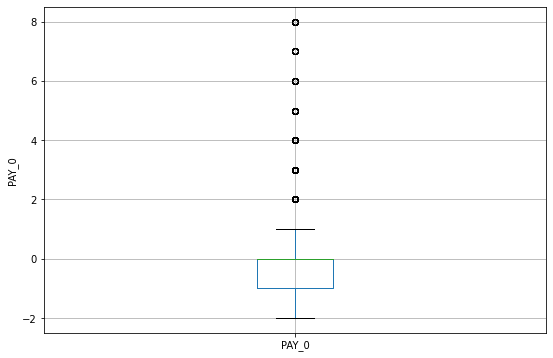

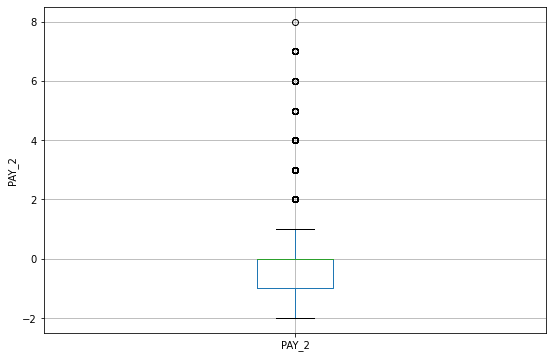

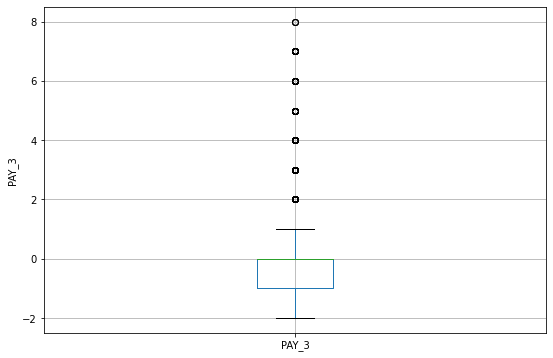

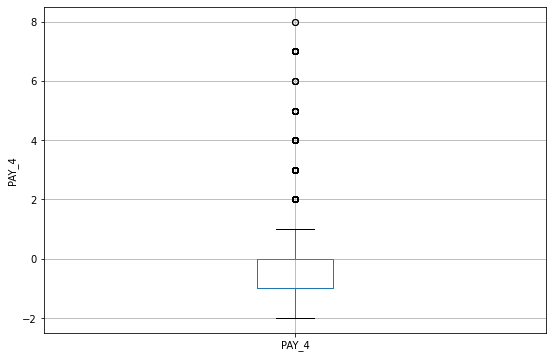

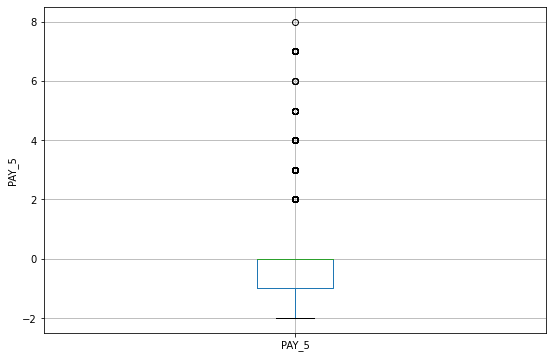

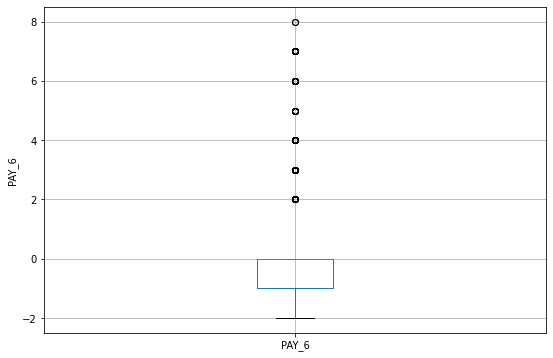

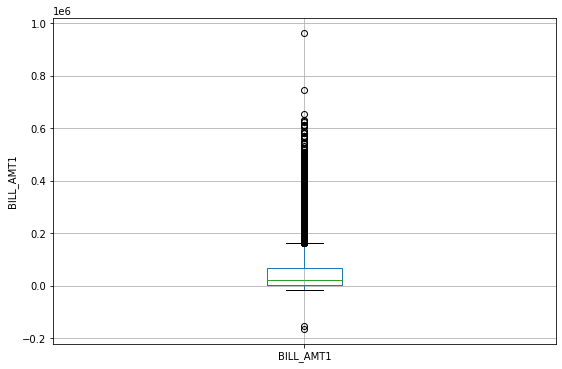

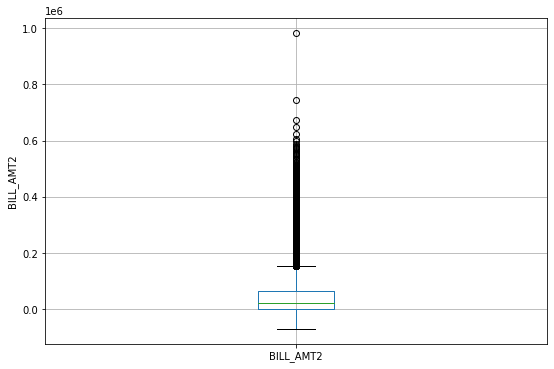

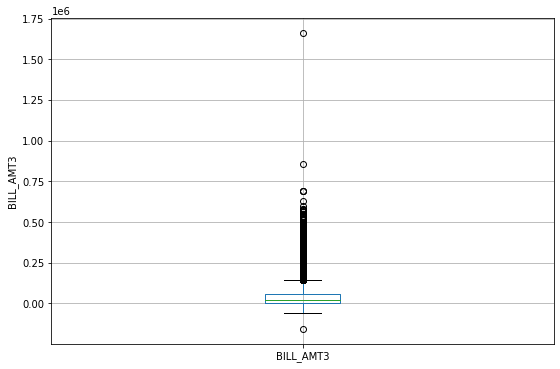

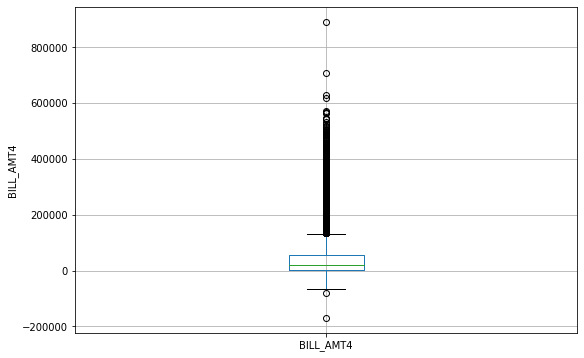

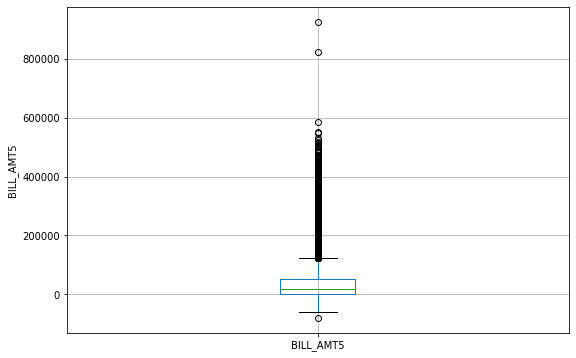

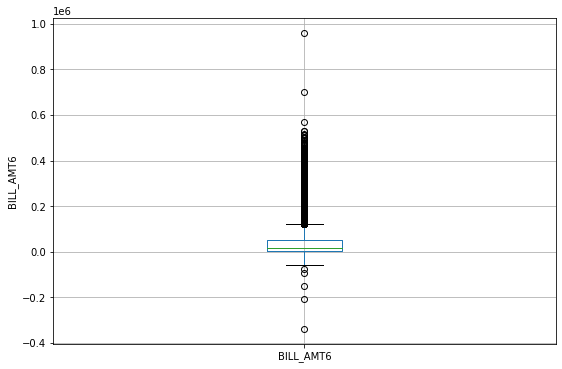

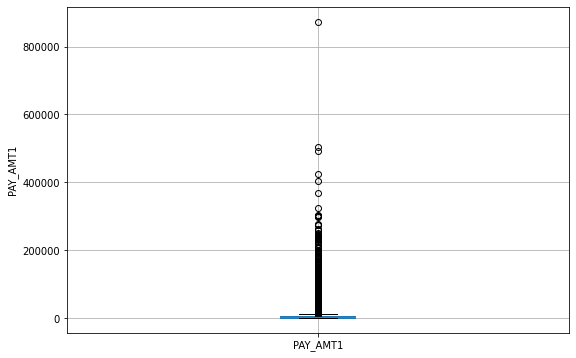

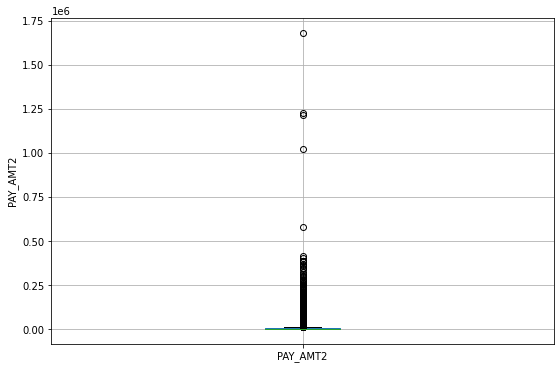

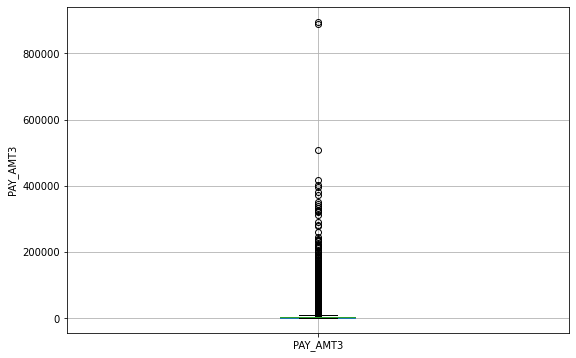

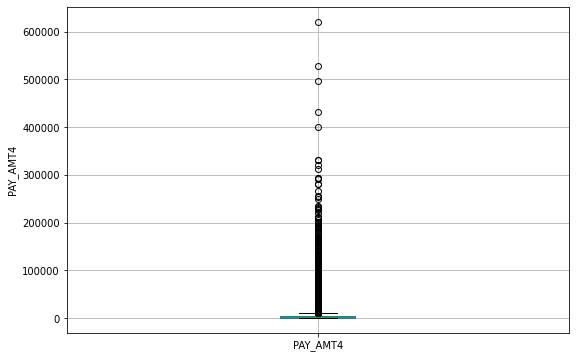

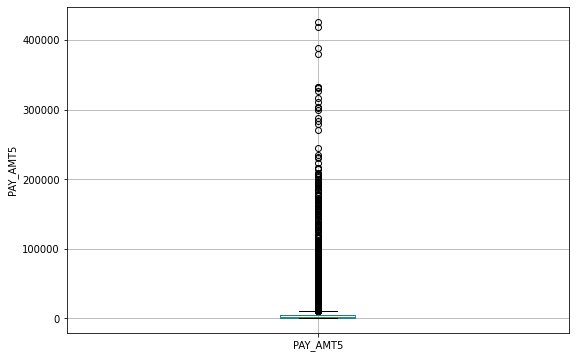

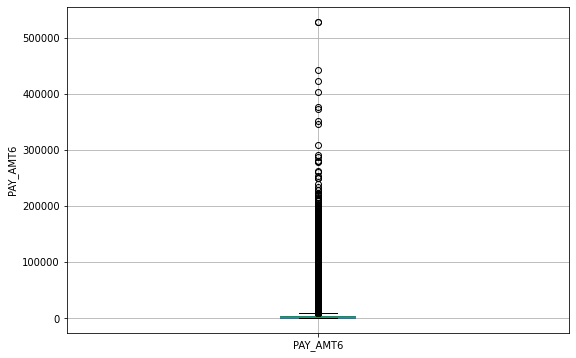

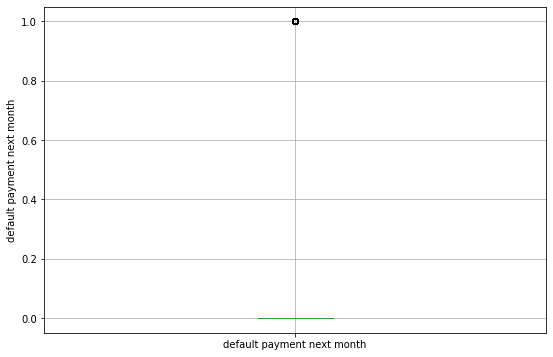

In [ ]:
# plot a boxplot for the label by each feature
for col in df.columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.show()

So, here we can see some outliers but we will not be treating these outliers due to a low amount of data we have been given. So let's just look at what we have in our dataset and plot the mean and median of all features using a histogram.

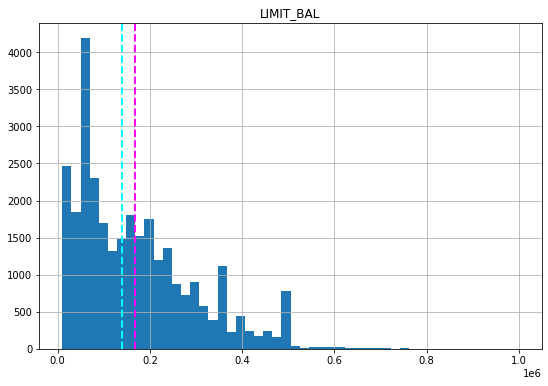

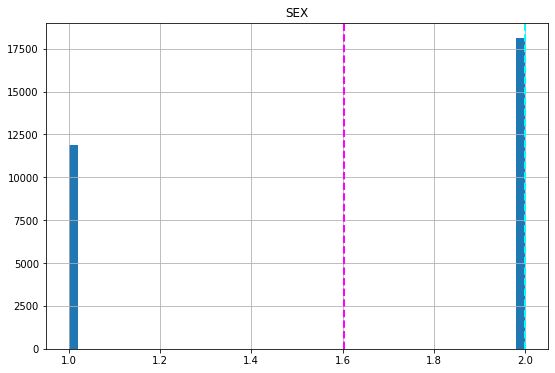

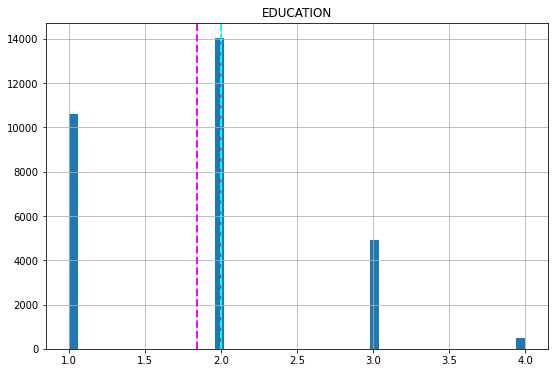

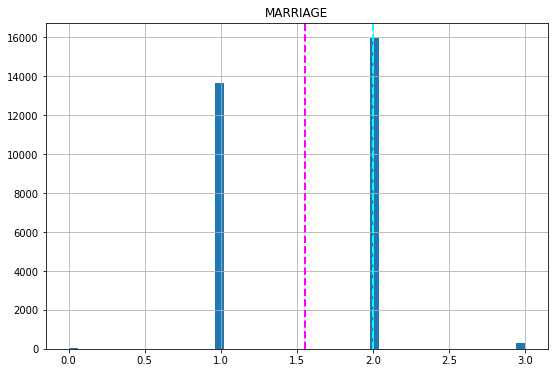

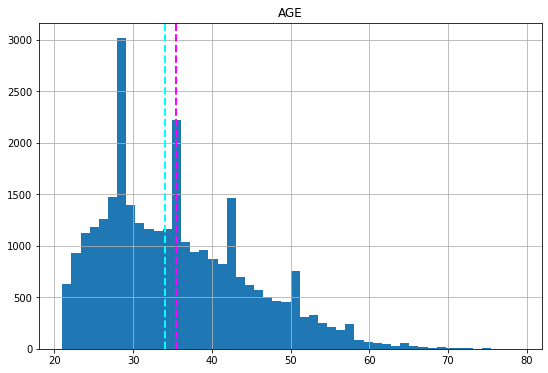

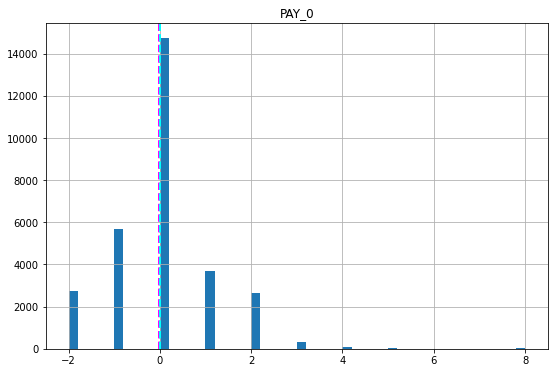

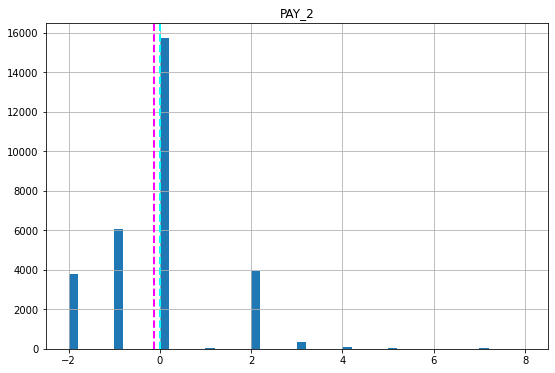

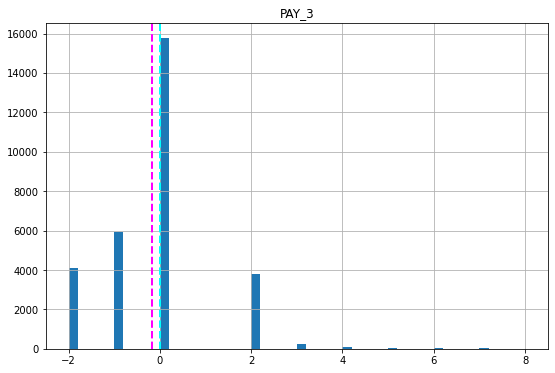

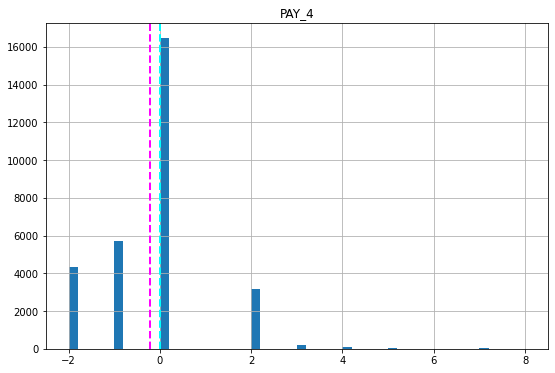

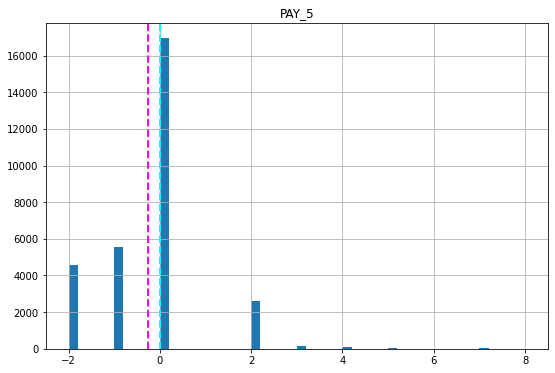

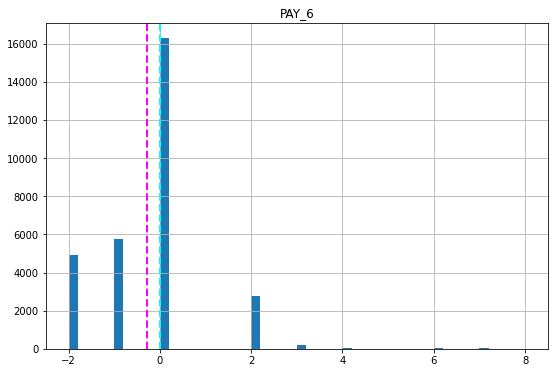

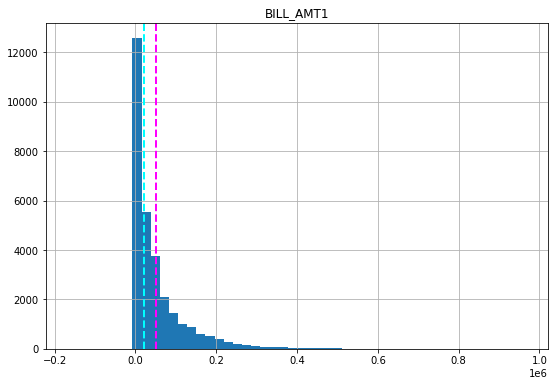

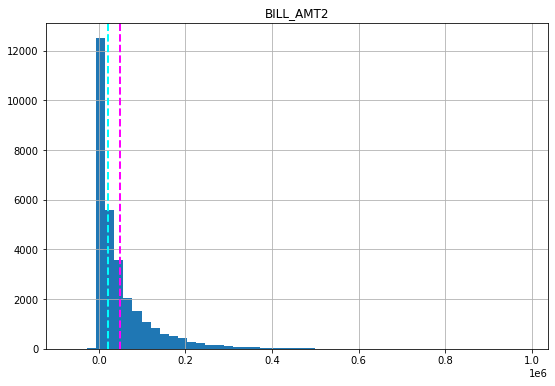

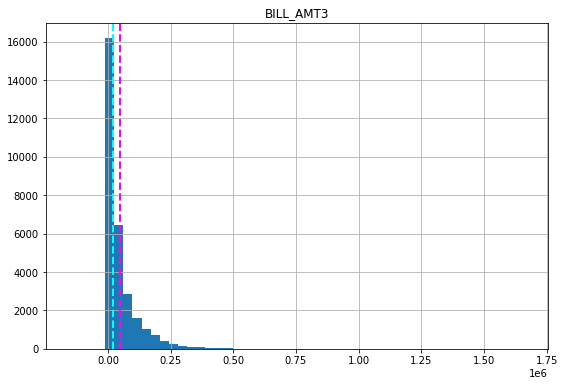

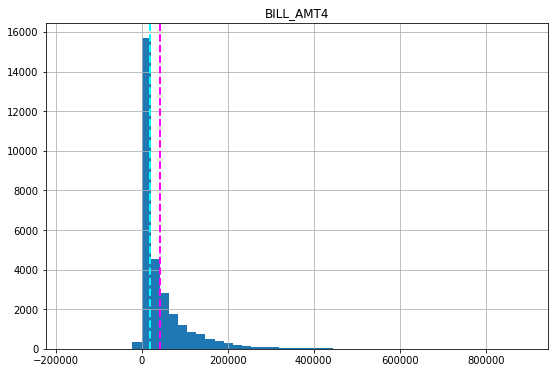

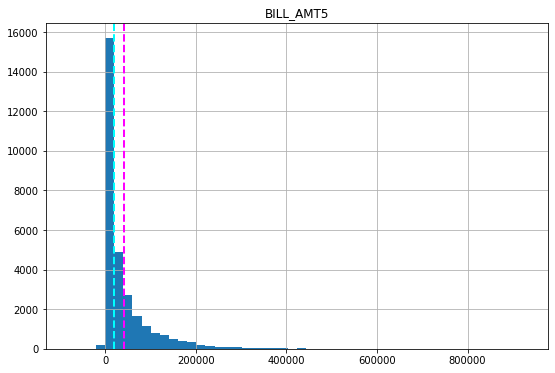

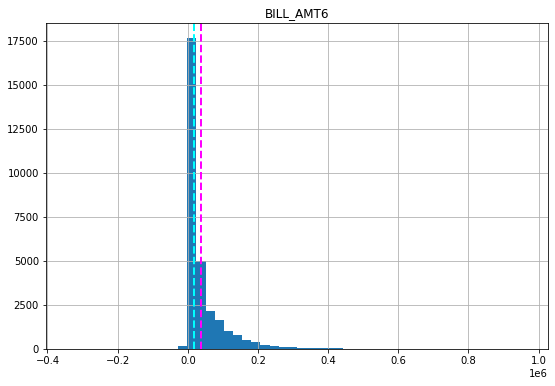

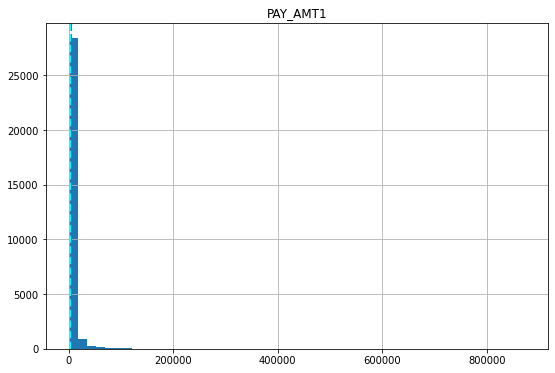

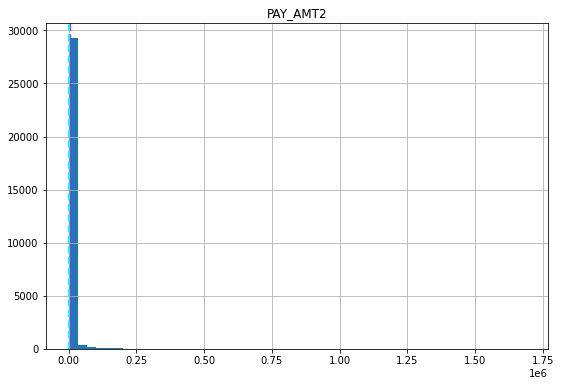

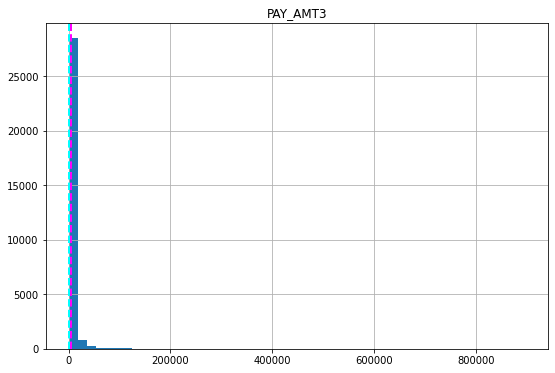

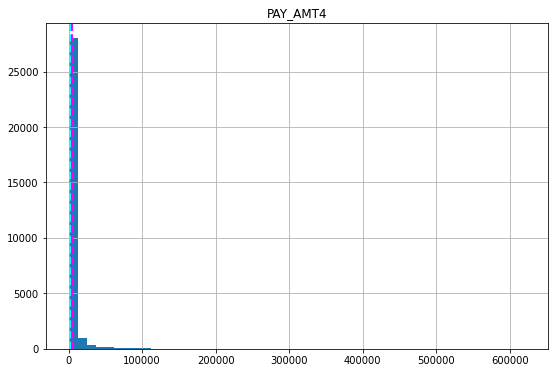

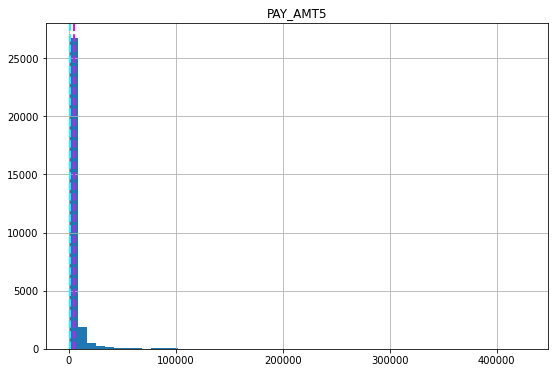

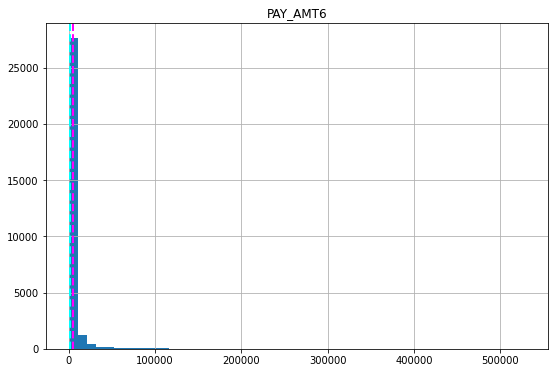

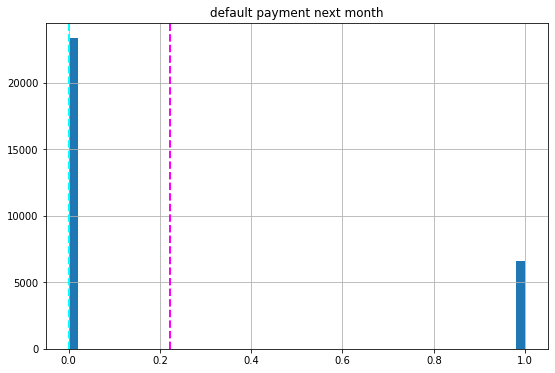

In [ ]:
# plot a bar plot for each feature count
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

So here we see the data is almost normally distributed and without further working on them we will start some feature engineering to 

##Feature Engineering

Okay so we have all the bills from April to September instead of having them differently we can have them as one total bill and work on that.

In [ ]:
df['Total_Bill']=df['BILL_AMT1']	+df['BILL_AMT2']+df['BILL_AMT3']	+df['BILL_AMT4']	+df['BILL_AMT5']	+df['BILL_AMT6']

In [ ]:
df['Total_Bill']

0          7704
1         17077
2        101653
3        231334
4        109339
          ...  
29995    725349
29996     21182
29997     70496
29998    266611
29999    230874
Name: Total_Bill, Length: 30000, dtype: int64

Similarly we can have the total paid feature instead of having different feature for 

In [ ]:
df['Total_Paid']=df['PAY_AMT1']	+df['PAY_AMT2']+df['PAY_AMT3']	+df['PAY_AMT4']	+df['PAY_AMT5']	+df['PAY_AMT6']

In [ ]:
df['Total_Paid']

0           689
1          5000
2         11018
3          8388
4         59049
          ...  
29995     42550
29996     14490
29997     31300
29998    147181
29999      8308
Name: Total_Paid, Length: 30000, dtype: int64

In [ ]:
df['Payment_Left']=df['Total_Bill']-df['Total_Paid']

In [ ]:
df[['LIMIT_BAL','Total_Bill','Total_Paid','Payment_Left','default payment next month']]

,LIMIT_BAL,Total_Bill,Total_Paid,Payment_Left,default payment next month
0,20000,7704,689,7015,1
1,120000,17077,5000,12077,1
2,90000,101653,11018,90635,0
3,50000,231334,8388,222946,0
4,50000,109339,59049,50290,0
...,...,...,...,...,...
29995,220000,725349,42550,682799,0
29996,150000,21182,14490,6692,0
29997,30000,70496,31300,39196,1
29998,80000,266611,147181,119430,1


In [ ]:
df[df['Total_Bill']<df['Total_Paid']][['Total_Bill','Total_Paid','default payment next month']]

,Total_Bill,Total_Paid,default payment next month
26,-394,2500,1
33,125744,158502,0
37,32279,53349,0
67,8589,9198,0
68,7901,41379,0
...,...,...,...
29923,13297,13305,0
29942,11688,12615,1
29962,7564,7828,0
29983,21242,21288,0


In [ ]:
df[df['Payment_Left']<0]['Payment_Left'].count()

3202

###One-Hot Encoding

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'Total_Bill', 'Total_Paid',
       'Payment_Left'],
      dtype='object')

In [ ]:
# One-hot encoding
final_df=df.copy()
final_df = pd.get_dummies(final_df, columns=["SEX"])
final_df = pd.get_dummies(final_df, columns=["EDUCATION"])
final_df = pd.get_dummies(final_df, columns=["MARRIAGE"])


In [ ]:
final_df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Paid,Payment_Left,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689,7015,0,1,0,1,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000,12077,0,1,0,1,0,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018,90635,0,1,0,1,0,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388,222946,0,1,0,1,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049,50290,1,0,0,1,0,0,0,1,0,0


In [ ]:
final_df.corr()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Paid,Payment_Left,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
LIMIT_BAL,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520,0.302044,0.352655,0.256616,-0.024755,0.024755,0.258777,-0.147530,-0.139686,0.013420,-0.011299,0.103701,-0.090998,-0.055806
AGE,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890,0.054981,0.040776,0.050634,0.090874,-0.090874,-0.100423,-0.077626,0.231252,0.008982,0.010731,0.449425,-0.466584,0.082771
PAY_0,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794,0.191803,-0.116810,0.220029,0.057643,-0.057643,-0.142720,0.099177,0.058902,-0.024937,-0.005667,-0.016314,0.013173,0.017358
PAY_2,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551,0.238182,-0.092553,0.264440,0.070771,-0.070771,-0.169215,0.122364,0.064590,-0.033118,-0.002481,-0.022525,0.020281,0.011657
PAY_3,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253,0.235960,-0.071732,0.258630,0.066096,-0.066096,-0.160209,0.115644,0.062461,-0.034435,-0.001331,-0.030584,0.027195,0.016646
PAY_4,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614,0.244561,-0.050720,0.264100,0.060173,-0.060173,-0.152402,0.110340,0.058382,-0.030998,-0.005438,-0.030167,0.026955,0.017481
PAY_5,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149,0.257594,-0.030362,0.274311,0.055064,-0.055064,-0.138709,0.103218,0.049577,-0.028822,-0.005292,-0.034081,0.032107,0.011396
PAY_6,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,0.186866,0.263318,-0.014856,0.277697,0.044008,-0.044008,-0.125123,0.098013,0.041370,-0.035733,-0.004979,-0.031772,0.028763,0.016297
BILL_AMT1,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.019644,0.940100,0.256381,0.939610,0.033642,-0.033642,-0.024045,0.030323,-0.022006,0.036364,-0.017775,0.025264,-0.021347,-0.011401
BILL_AMT2,0.278314,0.054283,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.014193,0.961178,0.286736,0.956555,0.031183,-0.031183,-0.020334,0.028716,-0.022761,0.030778,-0.015044,0.022429,-0.018339,-0.013383


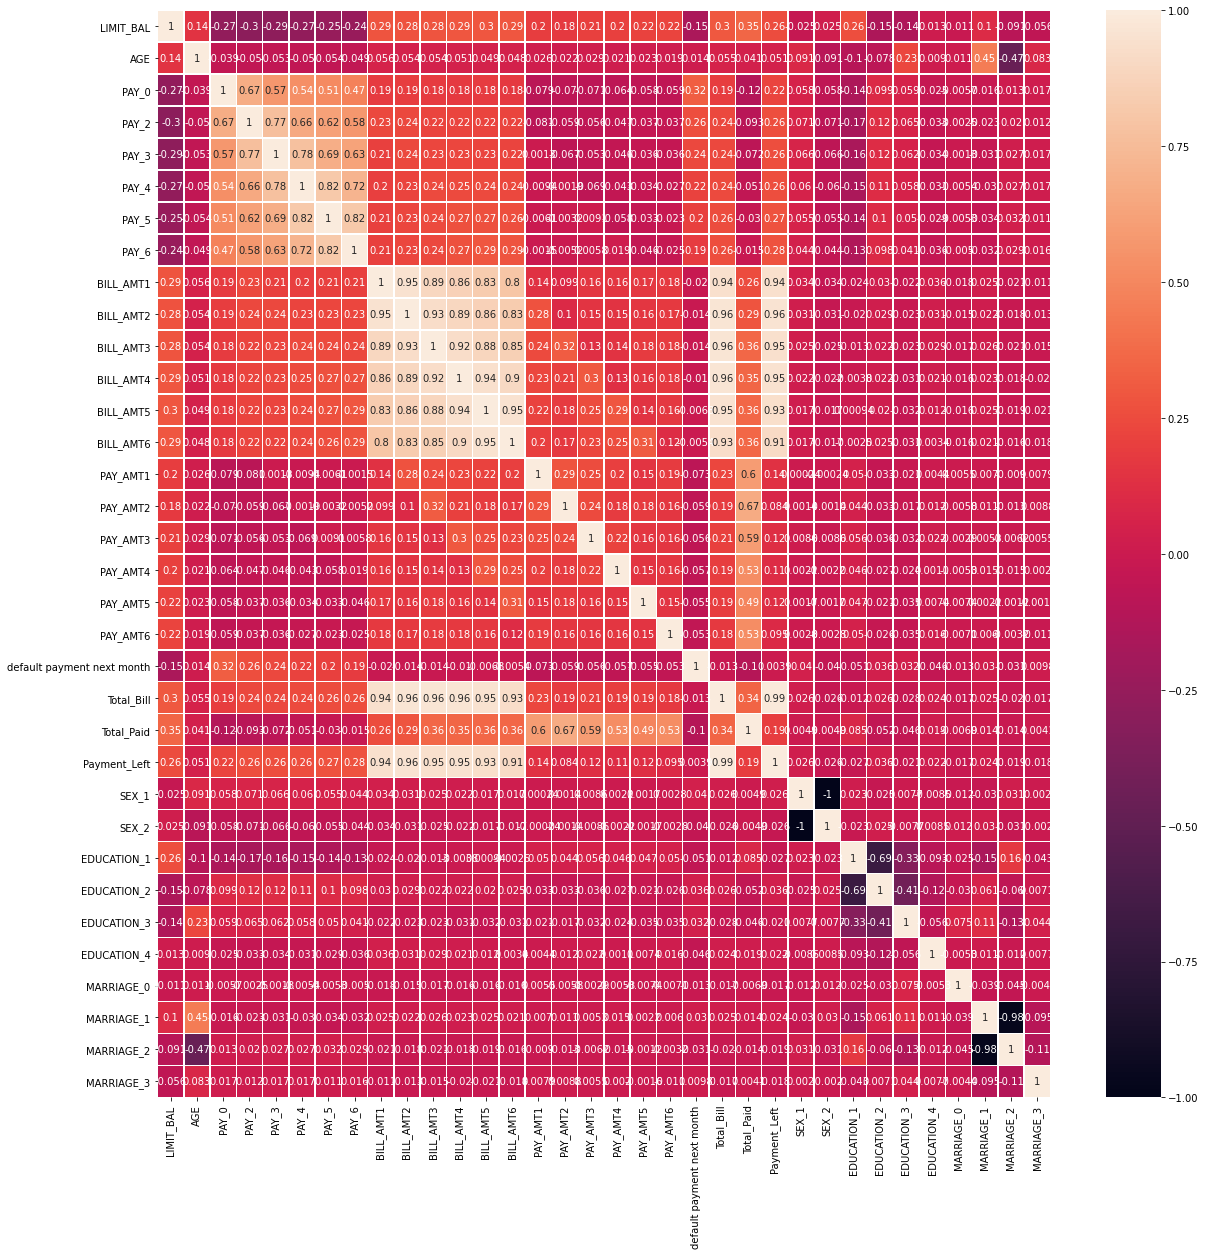

In [ ]:
plt.figure (figsize= (20,20))
sns.heatmap(final_df.corr(),linewidths=.5,annot=True)

In [ ]:
final_df

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total_Bill,Total_Paid,Payment_Left,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689,7015,0,1,0,1,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000,12077,0,1,0,1,0,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018,90635,0,1,0,1,0,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388,222946,0,1,0,1,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049,50290,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,725349,42550,682799,1,0,0,0,1,0,0,1,0,0
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,21182,14490,6692,1,0,0,0,1,0,0,0,1,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,70496,31300,39196,1,0,0,1,0,0,0,0,1,0
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,266611,147181,119430,1,0,0,0,1,0,0,1,0,0


In [ ]:
# 'BILL_AMT2'	,'BILL_AMT3'	,'BILL_AMT4'	,'BILL_AMT5'	,'BILL_AMT6'
del final_df['BILL_AMT1']
del final_df['BILL_AMT2']
del final_df['BILL_AMT3']
del final_df['BILL_AMT4']
del final_df['BILL_AMT5']
del final_df['BILL_AMT6']
del final_df['PAY_AMT1']
del final_df['PAY_AMT2']
del final_df['PAY_AMT3']
del final_df['PAY_AMT4']
del final_df['PAY_AMT5']
del final_df['PAY_AMT6']

In [ ]:
final_df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,Total_Bill,Total_Paid,Payment_Left,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,1,7704,689,7015,0,1,0,1,0,0,0,1,0,0
1,120000,26,-1,2,0,0,0,2,1,17077,5000,12077,0,1,0,1,0,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,0,101653,11018,90635,0,1,0,1,0,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,0,231334,8388,222946,0,1,0,1,0,0,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,0,109339,59049,50290,1,0,0,1,0,0,0,1,0,0


#Train-Test split

In [ ]:
final_df.describe().columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'default payment next month', 'Total_Bill', 'Total_Paid',
       'Payment_Left', 'SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [ ]:
# Let's create numpy arrays for features and target
X = final_df.drop('default payment next month',axis=1).values
y = final_df['default payment next month'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

#K-Nearest Neighbors

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

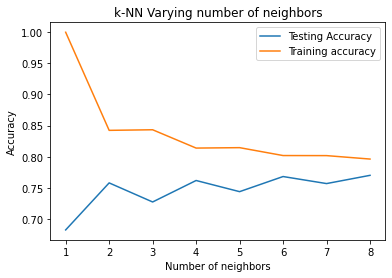

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.7705833333333333

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[9063,  283],
       [2470,  184]])

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

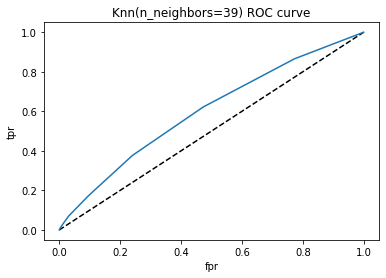

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=39) ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.599883108901672

##Cross Validation

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv.best_score_

0.7782666666666668

In [ ]:
knn_cv.best_params_

{'n_neighbors': 46}

In [ ]:
error_rate=[]
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)
error_rate.append(np.mean(pred_i != y_test))

In [ ]:
error_rate

[0.22333333333333333]

Text(0, 0.5, 'Error Rate')

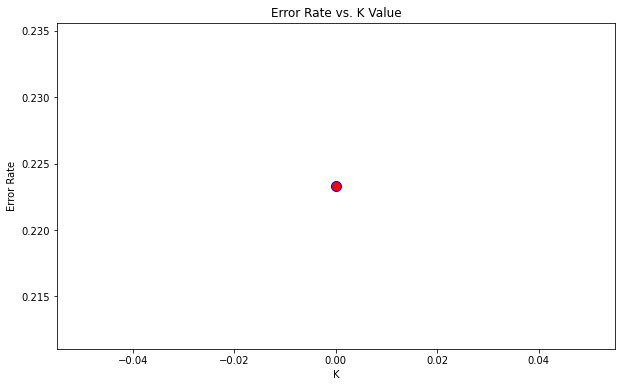

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##Knn kernels

#Random Forest Classifier

#Neural Network

In [ ]:
X_train = final_df.drop('default payment next month', inplace=False, axis=1) #remove 'target' column from input features
y_train = final_df['default payment next month'] #stores target (1 or 0) in a separate array

#since we shuffled, the index numbers were messed up, this resets them
X_train = X_train.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True)

#convert to numpy arrays with float values
X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=float)

#reshape y_train to make matrix multiplication possible
y_train = np.array(y_train).reshape(-1, 1)

##Initializing Weights

In [ ]:
class Perceptron:
    def __init__(self, x, y):

        self.input = np.array(x, dtype=float) 
        self.label = np.array(y, dtype=float)
        self.weights = np.random.rand(x.shape[1], y.shape[1]) #randomly initialize the weights
        self.z = self.input@self.weights #dot product of the vectors
        self.yhat = self.sigmoid(self.z) #apply activation function

    
    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))

    def sigmoid_deriv(self, x):
        s = sigmoid(x)
        return s(1-s)

    def forward_prop(self):
        self.yhat = self.sigmoid(self.input @ self.weights) #@ symbol represents matrix multiplication (also works for vectors)
        return self.yhat

    def back_prop(self):
        gradient = self.input.T @ (-2.0*(self.label - self.yhat)*self.sigmoid(self.yhat))  #self.input is the x value

        self.weights -= gradient #process of finding the minimum loss

##Fitting the data

In [ ]:
simple_nn = Perceptron(X_train, y_train)
training_iterations = 1000

history = [] #we will store how the mean squared error changes after each iteration in this array

def mse(yhat, y):
    sum = 0.0
    for pred, label in zip(yhat, y):
        sum += (pred-label)**2
    return sum/len(yhat)

for i in range(training_iterations):
    simple_nn.forward_prop()
    simple_nn.back_prop()
    yhat = simple_nn.forward_prop()
    history.append(mse(yhat, simple_nn.label))
   
    
yhat = simple_nn.forward_prop()
print(f'Final Mean Squared Error: {mse(yhat, simple_nn.label)}')

Final Mean Squared Error: [0.22123333]


Text(0.5, 0, 'Training Iteration')

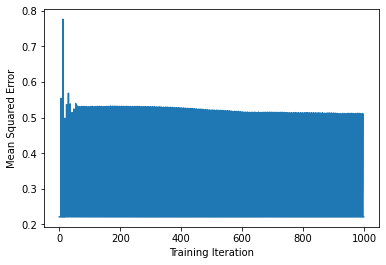

In [ ]:
plt.plot(history)
plt.ylabel('Mean Squared Error')
plt.xlabel('Training Iteration')

#DNN using smote

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(final_df.iloc[:,0:-1], final_df['default payment next month'])

print('Original dataset shape', len(final_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [ ]:
y_train.shape

(37382,)

In [ ]:
# DNN
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
x_train.shape

(37382, 33)

In [ ]:
# DNN (fit and validation)
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
74/74 [==============================] - 2s 21ms/step - loss: 1915.1960 - accuracy: 0.4272 - val_loss: 2.1568 - val_accuracy: 0.4991
Epoch 2/20
74/74 [==============================] - 1s 20ms/step - loss: 2.1206 - accuracy: 0.5045 - val_loss: 1.9969 - val_accuracy: 0.4991
Epoch 3/20
74/74 [==============================] - 1s 19ms/step - loss: 1.9651 - accuracy: 0.5036 - val_loss: 1.8784 - val_accuracy: 0.5007
Epoch 4/20
74/74 [==============================] - 1s 19ms/step - loss: 1.8495 - accuracy: 0.4970 - val_loss: 1.7790 - val_accuracy: 0.5009
Epoch 5/20
74/74 [==============================] - 1s 19ms/step - loss: 1.7546 - accuracy: 0.4993 - val_loss: 1.6880 - val_accuracy: 0.5009
Epoch 6/20
74/74 [==============================] - 1s 19ms/step - loss: 1.6670 - accuracy: 0.4975 - val_loss: 1.6059 - val_accuracy: 0.5009
Epoch 7/20
74/74 [==============================] - 1s 20ms/step - loss: 1.5863 - accuracy: 0.5019 - val_loss: 1.5303 - val_accuracy: 0.5009
Epoch 8/20

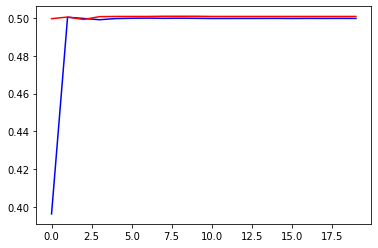

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fit.history['accuracy'], color='blue')
plt.plot(fit.history['val_accuracy'], color='red')
plt.show()

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

NameError: ignored

#XGB Classifier

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, Y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

print('ROCAUC score:', roc_auc_score(Y_test, xgb_y_predict))
print('Accuracy score:', accuracy_score(Y_test, xgb_y_predict))

NameError: ignored